In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
data = pd.read_csv("/content/yield_df.csv")



In [5]:
print(data)

       Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2  

In [8]:
# shape of dataset
print("Shape:", data.shape)

# column names
print("\nColumns:")
print(data.columns)

# data types
print("\nData Types:")
print(data.dtypes)

# missing values
print("\nMissing values:")
print(data.isnull().sum())

Shape: (28242, 8)

Columns:
Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

Data Types:
Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

Missing values:
Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [10]:
data = data.dropna()


In [11]:
le_area = LabelEncoder()
le_item = LabelEncoder()

data['Area'] = le_area.fit_transform(data['Area'])
data['Item'] = le_item.fit_transform(data['Item'])


In [12]:
X = data.drop('hg/ha_yield', axis=1)
y = data['hg/ha_yield']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
predictions = model.predict(X_test)


In [17]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 9726.911054837283
R2 Score: 0.986956565026826


In [18]:
importance = model.feature_importances_
features = X.columns

imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(imp_df)


                         Feature  Importance
2                           Item    0.608686
5              pesticides_tonnes    0.107122
6                       avg_temp    0.106361
4  average_rain_fall_mm_per_year    0.083249
0                     Unnamed: 0    0.046704
3                           Year    0.024303
1                           Area    0.023576


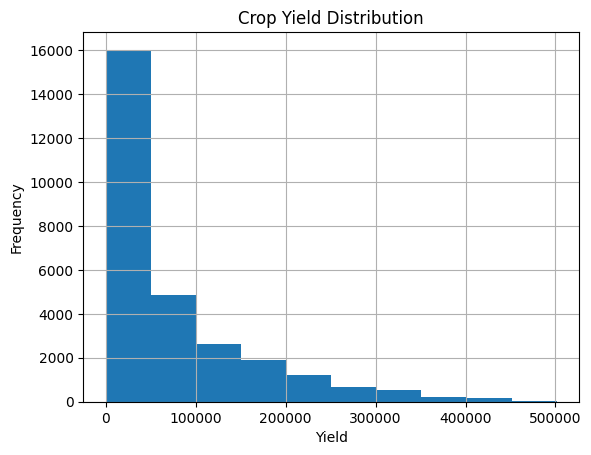

In [20]:
import matplotlib.pyplot as plt

plt.figure()
data['hg/ha_yield'].hist()
plt.title("Crop Yield Distribution")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()


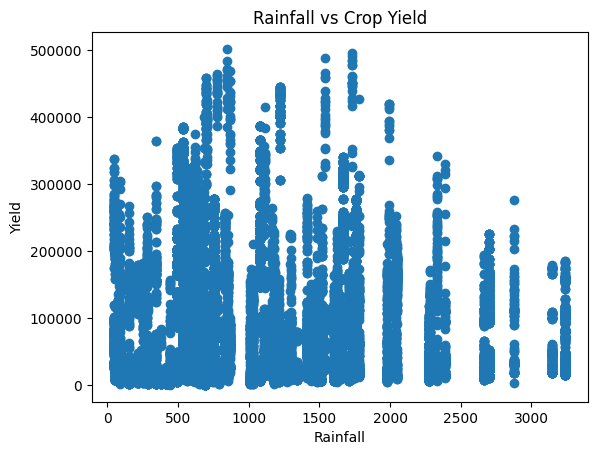

In [21]:
plt.figure()
plt.scatter(data['average_rain_fall_mm_per_year'], data['hg/ha_yield'])
plt.xlabel("Rainfall")
plt.ylabel("Yield")
plt.title("Rainfall vs Crop Yield")
plt.show()


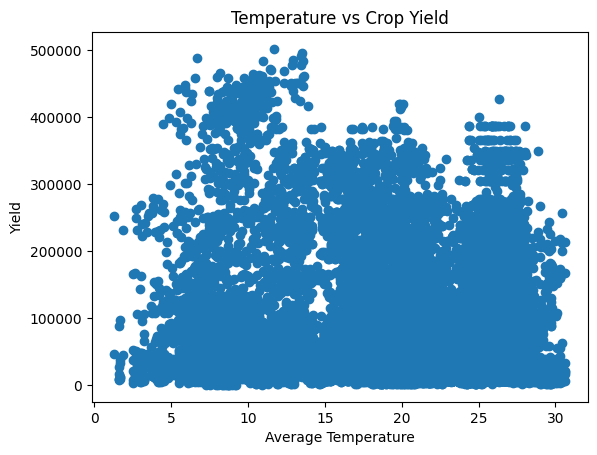

In [22]:
plt.figure()
plt.scatter(data['avg_temp'], data['hg/ha_yield'])
plt.xlabel("Average Temperature")
plt.ylabel("Yield")
plt.title("Temperature vs Crop Yield")
plt.show()


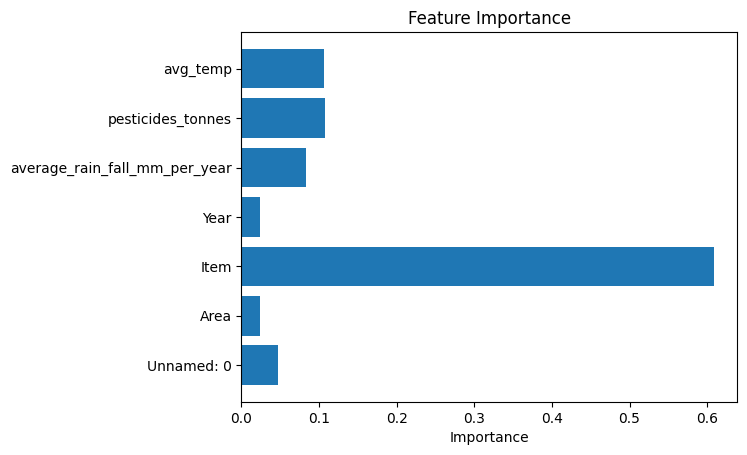

In [23]:
importance = model.feature_importances_
features = X.columns

plt.figure()
plt.barh(features, importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()


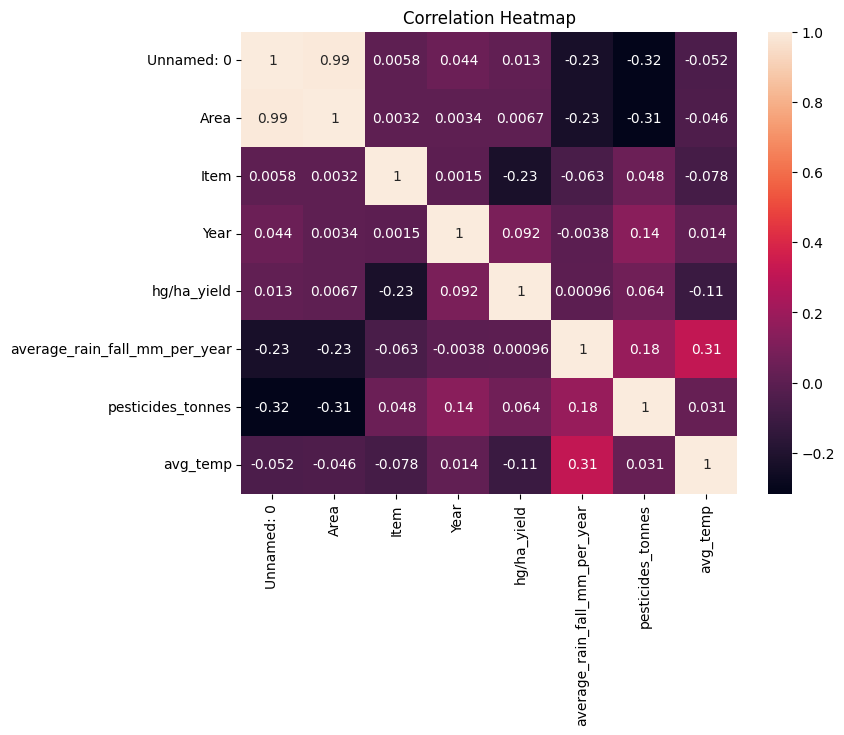

In [24]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()
